# <CENTER><B> HEALTH INSURANCE</CENTER></B>

<CENTER><B> IMPORTING NECESSARY LIBRARIES </CENTER></B>

In [497]:
# Intractive notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
#pd.set_option("display.max_columns",50)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder 
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
from sklearn.metrics import accuracy_score,auc,recall_score,precision_score,precision_recall_curve,confusion_matrix,\
plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve,classification_report,roc_auc_score,f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,KFold,RandomizedSearchCV,StratifiedKFold
from xgboost import XGBClassifier

<B>LOADING TRAIN SET </B>

In [362]:
train_data= pd.read_csv("trainhealth.csv",index_col=0)

In [363]:
train_data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
ID,,,,,,,,,,,,,
1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


<b>LOADING TEST SET </B>

In [364]:
test_data= pd.read_csv("testhealth.csv",index_col=0)

In [365]:
test_data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
ID,,,,,,,,,,,,
50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


# <CENTER><B>EXPLORATORY DATA ANALYSIS </B></CENTER>

In [366]:
train_data.shape

(50882, 13)

In [367]:
test_data.shape

(21805, 12)

In [368]:
COLS=train_data.columns
COLS

Index(['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Health Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response'],
      dtype='object')

<b><center>BASIC SUMMARY OF DATA </center></b>

In [369]:
#function to count null values,unique values,data types and blank counts in a data
def data_info(df=train_data):
    df_info = pd.DataFrame(df.isna().sum(),columns = ['Null_count'])
    df_info['Non_Null_count'] = df_info.index.map(df.notna().sum())
    df_info['N_unique'] = df_info.index.map(df.nunique())
    df_info['D_types'] = df_info.index.map(df.dtypes)
    df_info['Blank_count'] = df_info.index.map((df=='').sum())
    return df_info

<b> TRAIN DATA </b>

In [370]:
data_info(train_data)
#there are 2 variables(education and previous year rating) with null count,no variable having blank count in train data

,Null_count,Non_Null_count,N_unique,D_types,Blank_count
City_Code,0,50882,36,object,0
Region_Code,0,50882,5316,int64,0
Accomodation_Type,0,50882,2,object,0
Reco_Insurance_Type,0,50882,2,object,0
Upper_Age,0,50882,58,int64,0
Lower_Age,0,50882,60,int64,0
Is_Spouse,0,50882,2,object,0
Health Indicator,11691,39191,9,object,0
Holding_Policy_Duration,20251,30631,15,object,0
Holding_Policy_Type,20251,30631,4,float64,0


<B>SUMMARY OF THE ABOVE ANALYSIS</b><br> There are 11691 null entries in Health Indicator</br><br> There are 20251 null values in 
Holding_Policy_Type</br><br> There are 20251 null values in Health_Policy_Duration</br><br>There are 36 unique city codes</br>
<br>There are only two type of accomodation</br><br>There are two type of Reco_Insurance_Type</br><br>There are two values for Is_Spouse</br><br>There are 9 Health_Indicators<br><b>NUMERICAL VARIABLES</b>- Region_Code(5316),Upper_Age(56),Lower_Age(60),Holding_Policy_Type(4),Reco_Policy_Cat(22),Reco_Policy_Premium(6977),Response(2)</br>
<br><b>CATEGORICAL VARIABLES</b>-City_Code (36 unique values), Accomodation_Type(2 unique values),Reco_Insurance_type(2 unique values),Is_Spouse(2 unique values),Health Indicator(9 unique values),Holding_Policy_Duration(15 unique values)</br>


In [371]:
#to checkl values of city codes
train_data['City_Code'].value_counts(dropna=False)

C1     8973
C2     7747
C3     4889
C4     3671
C9     2185
C6     1950
C7     1910
C8     1806
C10    1611
C5     1364
C15    1186
C17    1159
C11    1147
C16    1135
C13    1005
C20     926
C19     899
C12     868
C18     797
C14     746
C21     679
C23     587
C24     553
C22     516
C26     499
C29     387
C25     366
C27     295
C33     286
C28     285
C32     160
C34     130
C30      58
C35      56
C36      36
C31      15
Name: City_Code, dtype: int64

In [372]:
train_data['Region_Code'].value_counts(dropna=False)

1       96
5       75
2       73
6       73
4       73
        ..
5548     1
5671     1
5639     1
5686     1
5524     1
Name: Region_Code, Length: 5316, dtype: int64

In [373]:
train_data['Accomodation_Type'].value_counts(dropna=False)

Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64

In [374]:
#to check the reco insurance type
train_data['Reco_Insurance_Type'].value_counts(dropna=False)

Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64

In [375]:
#to check values of is spouse
train_data['Is_Spouse'].value_counts(dropna=False)

No     42460
Yes     8422
Name: Is_Spouse, dtype: int64

In [376]:
#to check the values in health indicator
train_data['Health Indicator'].value_counts(dropna=False)

X1     13010
NaN    11691
X2     10332
X3      6762
X4      5743
X5      1727
X6      1280
X7       196
X8        78
X9        63
Name: Health Indicator, dtype: int64

In [377]:
#to checkl values of policy duration
train_data['Holding_Policy_Duration'].value_counts(dropna=False)

NaN     20251
1.0      4499
14+      4335
2.0      4260
3.0      3586
4.0      2771
5.0      2362
6.0      1894
7.0      1645
8.0      1316
9.0      1114
10.0      813
11.0      546
12.0      513
13.0      511
14.0      466
Name: Holding_Policy_Duration, dtype: int64

In [378]:
#to checkl values of policy type
train_data['Holding_Policy_Type'].value_counts(dropna=False)

NaN    20251
3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [379]:
train_data['Reco_Policy_Cat'].value_counts(dropna=False)

22    6602
18    5553
21    5027
16    4084
17    3756
19    3708
20    3177
12    2168
1     1967
2     1917
14    1742
13    1684
15    1615
3     1059
4     1015
5     1007
6      851
7      834
9      789
11     781
8      776
10     770
Name: Reco_Policy_Cat, dtype: int64

In [380]:
train_data['Reco_Policy_Premium'].value_counts(dropna=False)

10080.0    61
11880.0    59
12060.0    58
9296.0     56
11520.0    54
           ..
21918.0     1
23331.0     1
4336.0      1
31404.8     1
17955.0     1
Name: Reco_Policy_Premium, Length: 6977, dtype: int64

In [381]:
#to checkl values of response
train_data['Response'].value_counts(dropna=False)

0    38673
1    12209
Name: Response, dtype: int64

In [382]:
#converting numeric variables to categorical which have only less than 10 classes (Holding_Policy_Type and Response and Reco_Policy_Type)
train_data["Holding_Policy_Type"]=train_data["Holding_Policy_Type"].astype(object)
train_data["Response"]=train_data["Response"].astype(object)
train_data["Reco_Policy_Cat"]=train_data["Reco_Policy_Cat"].astype(object)

In [383]:
#to see the changes after conversion
train_data.dtypes

City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type         object
Reco_Policy_Cat             object
Reco_Policy_Premium        float64
Response                    object
dtype: object

<b> TEST DATA </b>

In [384]:
data_info(test_data)

,Null_count,Non_Null_count,N_unique,D_types,Blank_count
City_Code,0,21805,36,object,0
Region_Code,0,21805,4694,int64,0
Accomodation_Type,0,21805,2,object,0
Reco_Insurance_Type,0,21805,2,object,0
Upper_Age,0,21805,58,int64,0
Lower_Age,0,21805,60,int64,0
Is_Spouse,0,21805,2,object,0
Health Indicator,5027,16778,9,object,0
Holding_Policy_Duration,8603,13202,15,object,0
Holding_Policy_Type,8603,13202,4,float64,0


<B>SUMMARY OF THE ABOVE ANALYSIS</b><br> There are 5027 null entries in Health Indicator</br><br> There are 8603 null values in 
Holding_Policy_Type</br><br> There are 8603 null values in Health_Policy_Duration</br><br>There are 36 unique city codes</br>
<br>There are only two type of accomodation</br><br>There are two type of Reco_Insurance_Type</br><br>There are two values for Is_Spouse</br><br>There are 9 Health_Indicators<br><b>NUMERICAL VARIABLES</b>- Region_Code(4694),Upper_Age(58),Lower_Age(60),Holding_Policy_Type(4),Reco_Policy_Cat(22),Reco_Policy_Premium(5226)</br>
<br><b>CATEGORICAL VARIABLES</b>-City_Code (36 unique values), Accomodation_Type(2 unique values),Reco_Insurance_type(2 unique values),Is_Spouse(2 unique values),Health Indicator(9 unique values),Holding_Policy_Duration(15 unique values)</br>


In [385]:
#converting numeric variables to categorical which have only less than 10 classes (Holding_Policy_Type)
test_data["Holding_Policy_Type"]=test_data["Holding_Policy_Type"].astype(object)
test_data["Reco_Policy_Cat"]=test_data["Reco_Policy_Cat"].astype(object)

In [386]:
#to csee the changes after conversion
test_data.dtypes

City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type         object
Reco_Policy_Cat             object
Reco_Policy_Premium        float64
dtype: object

<b><center> CHECKING THE EVENT RATE (BALANCED/IMBALANCED DATASET)</b></center>

In [387]:
# to check that the classes are balanced or not(checking the event rate)
from collections import Counter
Counter(train_data.Response)
train_data.Response.value_counts(normalize=True)

Counter({0: 38673, 1: 12209})

0    0.760053
1    0.239947
Name: Response, dtype: float64

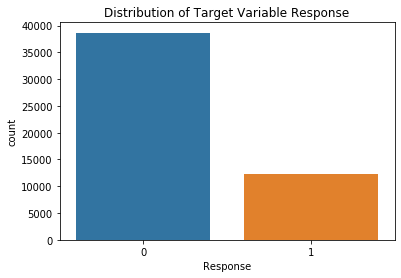

In [388]:
#to see the distribution of target variable
sns.countplot(train_data['Response']);
plt.title("Distribution of Target Variable Response");

<b>SUMMARY OF THE ABOVE ANALYSIS</B><BR>The event rate for our problem is 24% which is good enough to consider</br>

<center><b> TREATING THE NULL VALUES </center></b>

<B> TRAIN DATA </B>

In [389]:
#train_data["Reco_Policy_Cat"]=train_data["Reco_Policy_Cat"].astype('object')

In [390]:
#columns having null values greater than 1
train_data.isna().sum()[train_data.isna().sum()>0]

Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
dtype: int64

In [391]:
train_data.dtypes

City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type         object
Reco_Policy_Cat             object
Reco_Policy_Premium        float64
Response                    object
dtype: object

<b>Health Indicator</b>

X1     0.255690
NaN    0.229767
X2     0.203058
X3     0.132896
X4     0.112869
X5     0.033941
X6     0.025156
X7     0.003852
X8     0.001533
X9     0.001238
Name: Health Indicator, dtype: float64

Response,0,1
Health Indicator,,
Nan,0.765803,0.234197
X1,0.755880,0.244120
X2,0.758904,0.241096
X3,0.763531,0.236469
X4,0.756921,0.243079
X5,0.763752,0.236248
X6,0.760156,0.239844
X7,0.683673,0.316327
X8,0.769231,0.230769


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Bar plot ')

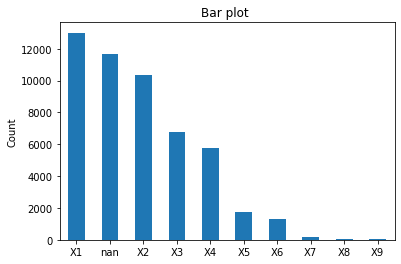

In [392]:
var = 'Health Indicator'
train_data[var].value_counts(dropna = False,normalize = True)
pd.crosstab(index = train_data[var].fillna('Nan'), columns = train_data.Response,margins = True,normalize='index',)
train_data[var].value_counts(dropna=False).sort_values(ascending=False).plot(kind='bar');
plt.xticks(rotation=360);
plt.ylabel("Count");
plt.title("Bar plot ")

In [393]:
#IMPUTATION
train_data["Health Indicator"]=train_data["Health Indicator"].fillna("GH")

<b>SUMMARY OF ABOVE ANALYSIS</B>
<BR>Health Indicator Variable has 22% nan values.It is the second highest value imputed in the Health Indicator column.I have imputed the null values with "GH" indicator indicating a good health of the customer.</br>

<b>Holding_Policy_Duration</b>

NaN     0.397999
1.0     0.088420
14+     0.085197
2.0     0.083723
3.0     0.070477
4.0     0.054459
5.0     0.046421
6.0     0.037223
7.0     0.032330
8.0     0.025864
9.0     0.021894
10.0    0.015978
11.0    0.010731
12.0    0.010082
13.0    0.010043
14.0    0.009158
Name: Holding_Policy_Duration, dtype: float64

Response,0,1
Holding_Policy_Duration,,
1.0,0.778395,0.221605
10.0,0.726937,0.273063
11.0,0.749084,0.250916
12.0,0.746589,0.253411
13.0,0.729941,0.270059
14+,0.749250,0.250750
14.0,0.753219,0.246781
2.0,0.762676,0.237324
3.0,0.767987,0.232013


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Bar plot ')

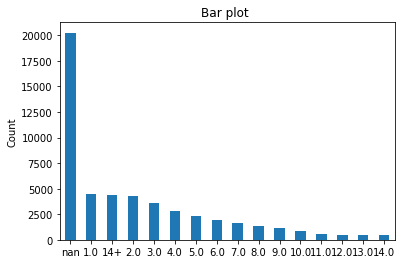

In [394]:
var = 'Holding_Policy_Duration'
train_data[var].value_counts(dropna = False,normalize = True)
pd.crosstab(index = train_data[var].fillna('Nan'), columns = train_data.Response,margins = True,normalize='index',)
train_data[var].value_counts(dropna=False).sort_values(ascending=False).plot(kind='bar');
plt.xticks(rotation=360);
plt.ylabel("Count");
plt.title("Bar plot ")


In [395]:
#Replacing 14+ with 15 in holding policy duration
train_data["Holding_Policy_Duration"] = np.where(train_data["Holding_Policy_Duration"]=='14+','15',train_data["Holding_Policy_Duration"])
train_data["Holding_Policy_Duration"].value_counts(dropna = False,normalize = True)

NaN     0.397999
1.0     0.088420
15      0.085197
2.0     0.083723
3.0     0.070477
4.0     0.054459
5.0     0.046421
6.0     0.037223
7.0     0.032330
8.0     0.025864
9.0     0.021894
10.0    0.015978
11.0    0.010731
12.0    0.010082
13.0    0.010043
14.0    0.009158
Name: Holding_Policy_Duration, dtype: float64

In [396]:
#Imputing null values of duration with 0 
train_data["Holding_Policy_Duration"]=train_data["Holding_Policy_Duration"].fillna(0)
train_data["Holding_Policy_Duration"].value_counts(dropna = False)

0       20251
1.0      4499
15       4335
2.0      4260
3.0      3586
4.0      2771
5.0      2362
6.0      1894
7.0      1645
8.0      1316
9.0      1114
10.0      813
11.0      546
12.0      513
13.0      511
14.0      466
Name: Holding_Policy_Duration, dtype: int64

In [397]:

#Converting Holing Policy duration variable into int
train_data["Holding_Policy_Duration"]=train_data["Holding_Policy_Duration"].astype(float)


<b>SUMMARY OF ABOVE ANALYSIS</B>
<BR>Holding Policy Duration Variable has 39% nan values.It is the highest value imputed in the Holding Policy Duration column.We have imputed the null values with 0 to represent duration = 0.Also converted the holding policy duration into float since it represent the no. of years of the holding policy.</br>

<b>Holding Policy Type<b>

NaN    0.397999
3.0    0.260976
1.0    0.160627
2.0    0.098365
4.0    0.082033
Name: Holding_Policy_Type, dtype: float64

Response,0,1
Holding_Policy_Type,,
1.0,0.764224,0.235776
2.0,0.762238,0.237762
3.0,0.757738,0.242262
4.0,0.751797,0.248203
Nan,0.761049,0.238951
All,0.760053,0.239947


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Bar plot ')

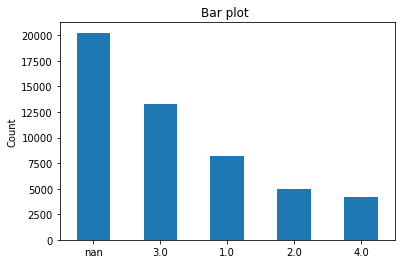

In [398]:
var = 'Holding_Policy_Type'
train_data[var].value_counts(dropna = False,normalize = True)
pd.crosstab(index = train_data[var].fillna('Nan'), columns = train_data.Response,margins = True,normalize='index',)
train_data[var].value_counts(dropna=False).sort_values(ascending=False).plot(kind='bar');
plt.xticks(rotation=360);
plt.ylabel("Count");
plt.title("Bar plot ")

In [399]:
#IMPUTATION
train_data["Holding_Policy_Type"]=train_data["Holding_Policy_Type"].fillna("NP")

<b>SUMMARY OF ABOVE ANALYSIS</B>
<BR>Holding Policy Type Variable has 39% nan values.It is the highest value imputed in the Holding Policy Type column.I have imputed the null values with "NP" indicating that customer has not taken any policy in this case.</br>

In [400]:
#to check any null values still left
train_data.isna().sum()[train_data.isna().sum()>0]

Series([], dtype: int64)

<B> TEST DATA </B>

In [401]:
test_data.isna().sum()[test_data.isna().sum()>0]

Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
dtype: int64

<b>Health Indicator</b>

X1     0.257464
NaN    0.230543
X2     0.207108
X3     0.130521
X4     0.111993
X5     0.031231
X6     0.023573
X7     0.004403
X8     0.001880
X9     0.001284
Name: Health Indicator, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Bar plot ')

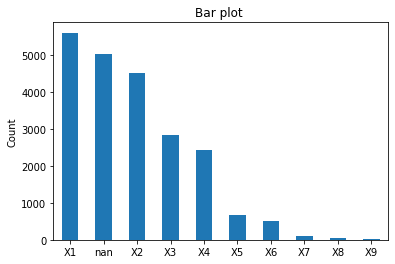

In [402]:
var = 'Health Indicator'
test_data[var].value_counts(dropna = False,normalize = True)
test_data[var].value_counts(dropna=False).sort_values(ascending=False).plot(kind='bar');
plt.xticks(rotation=360);
plt.ylabel("Count");
plt.title("Bar plot ")

In [403]:
#IMPUTATION
test_data["Health Indicator"]=test_data["Health Indicator"].fillna("GH")

<b>SUMMARY OF ABOVE ANALYSIS</B>
<BR>Health Indicator Variable has 22% nan values.It is the second highest value imputed in the Health Indicator column.I have imputed the null values with "GH" indicator indicating a good health of the customer.</br>

<b>Holding Policy Duration

NaN     0.394543
14+     0.086769
1.0     0.086723
2.0     0.081266
3.0     0.073653
4.0     0.055263
5.0     0.045494
6.0     0.041413
7.0     0.030452
8.0     0.026095
9.0     0.022609
10.0    0.015272
11.0    0.011649
13.0    0.010135
14.0    0.009677
12.0    0.008989
Name: Holding_Policy_Duration, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Bar plot ')

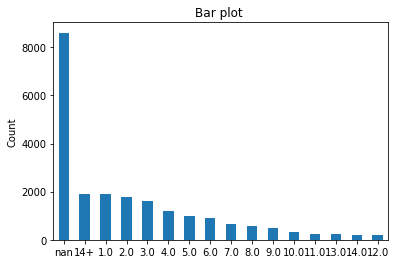

In [404]:
var = 'Holding_Policy_Duration'
test_data[var].value_counts(dropna = False,normalize = True)
test_data[var].value_counts(dropna=False).sort_values(ascending=False).plot(kind='bar');
plt.xticks(rotation=360);
plt.ylabel("Count");
plt.title("Bar plot ")

In [405]:
#Replacing 14+ with 15 in holding policy duration
test_data["Holding_Policy_Duration"] = np.where(test_data["Holding_Policy_Duration"]=='14+','15',test_data["Holding_Policy_Duration"])
test_data["Holding_Policy_Duration"]=test_data["Holding_Policy_Duration"].fillna(0)
test_data["Holding_Policy_Duration"]=test_data["Holding_Policy_Duration"].astype(float)

<b>SUMMARY OF ABOVE ANALYSIS</B>
<BR>Holding Policy Duration Variable has 39% nan values.It is the highest value imputed in the Holding Policy Duration column.We have imputed the null values with 0 to represent duration = 0.Also converted the holding policy duration into float since it represent the no. of years of the holding policy.</br>

<b>Holding Policy Type</b>

NaN    0.394543
3.0    0.255538
1.0    0.163907
2.0    0.098601
4.0    0.087411
Name: Holding_Policy_Type, dtype: float64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Bar plot ')

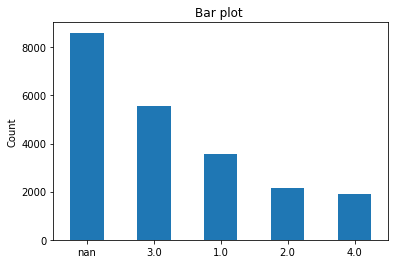

In [406]:
var = 'Holding_Policy_Type'
test_data[var].value_counts(dropna = False,normalize = True)
test_data[var].value_counts(dropna=False).sort_values(ascending=False).plot(kind='bar');
plt.xticks(rotation=360);
plt.ylabel("Count");
plt.title("Bar plot ")

In [407]:
#IMPUTATION
test_data["Holding_Policy_Type"]=test_data["Holding_Policy_Type"].fillna("NP")

<b>SUMMARY OF ABOVE ANALYSIS</B>
<BR>Holding Policy Type Variable has 39% nan values.It is the highest value imputed in the Holding Policy Type column.I have imputed the null values with "NP" indicating that customer has not taken any policy in this case.</br>

In [617]:
#to check any null values in test set
test_data.isna().sum()[test_data.isna().sum()>0]

Series([], dtype: int64)

<center><b> PREPARING TWO LISTS OF NUMERICAL AND CATEGORICAL VARIABLES SEPARATELY</center></b>

In [409]:
train_data.dtypes

City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration    float64
Holding_Policy_Type         object
Reco_Policy_Cat             object
Reco_Policy_Premium        float64
Response                    object
dtype: object

In [410]:
test_data["Reco_Policy_Cat"]=test_data["Reco_Policy_Cat"].astype('object')

In [411]:
test_data.dtypes

City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration    float64
Holding_Policy_Type         object
Reco_Policy_Cat             object
Reco_Policy_Premium        float64
dtype: object

<b>HIGH CARDINALITY PROBLEM (REGION_CODE)</B>

In [412]:
#train_data["Region_Code"]=train_data["Region_Code"].astype(str)

In [413]:
# to check that the classes are balanced or not(checking the event rate)
#from collections import Counter
#Region=Counter(train_data.Region_Code)
#Region

In [414]:
#train_data.Region_Code.value_counts(normalize=True)

In [415]:
#train_data['Region']= Region

In [416]:
#train_data['Reco_Policy_Cat']=train_data['Reco_Policy_Cat'].astype('object')
train_data.dtypes

City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration    float64
Holding_Policy_Type         object
Reco_Policy_Cat             object
Reco_Policy_Premium        float64
Response                    object
dtype: object

In [417]:
target = 'Response'
obj_cols = train_data.head().select_dtypes('O').columns # O means object
obj_cols = [i for  i in obj_cols if i not in [target,'ID']] # removing target and id from obj columns as they are not vars
obj_cols
num_cols = train_data.head().select_dtypes('number').columns # number will contain float and int
num_cols= [i for  i in num_cols if i not in [target,'ID']] # removing target and employee id from num columns as they are not vars
num_cols

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Type',
 'Reco_Policy_Cat']

['Region_Code',
 'Upper_Age',
 'Lower_Age',
 'Holding_Policy_Duration',
 'Reco_Policy_Premium']

In [418]:
train_data['Reco_Policy_Cat'].dtype

dtype('O')

In [419]:
train_data['Reco_Policy_Cat'].nunique()

22

<center><b> BAR GRAPHS FOR CATEGORICAL VARIABLES </center></b>

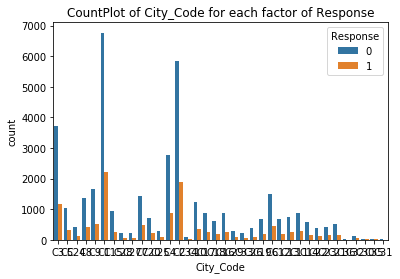

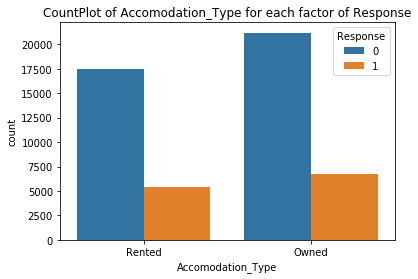

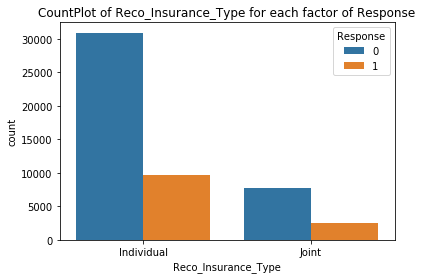

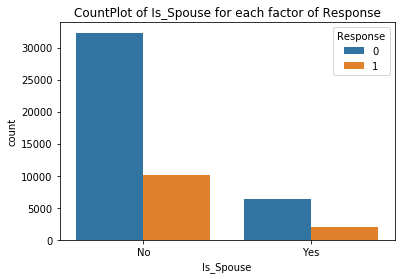

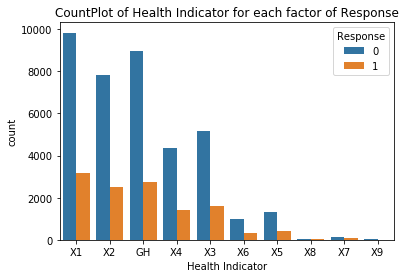

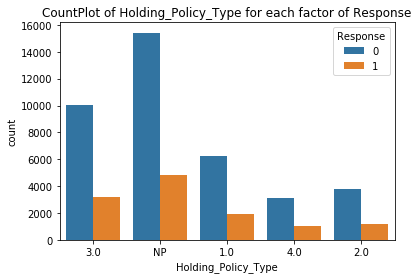

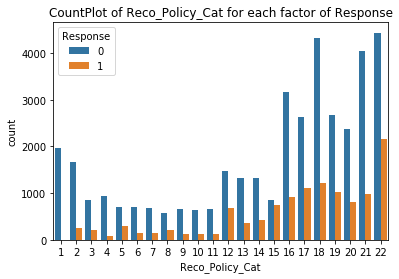

In [420]:
#BAR GRAPHS
for i in obj_cols:
    pfig = plt.figure();
    img = sns.countplot(x= i ,hue= target, data=train_data).set_title(f'CountPlot of {i} for each factor of {target}');
    fig = img.get_figure();

<center><b> PAIR PLOTS FOR NUMERICAL VARIABLE </center></b>

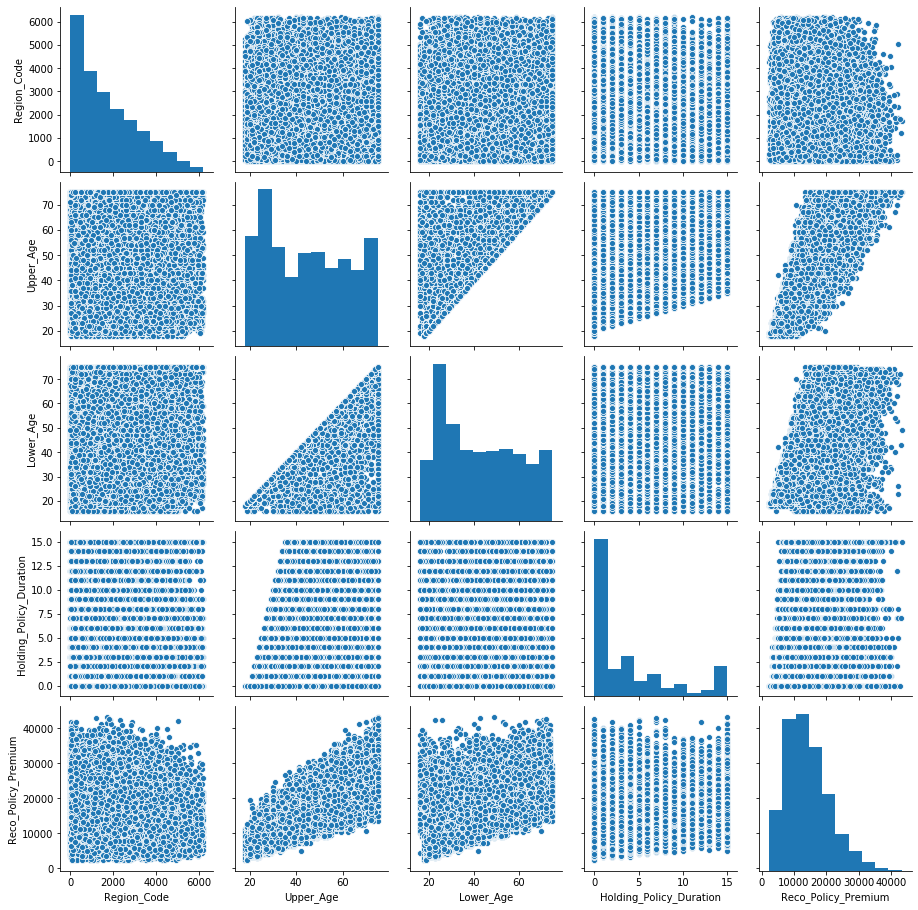

In [325]:
#PAIR PLOTS
sns.pairplot(train_data[num_cols]);

<center><b> CORELATION MATRIX FOR NUMERICAL VARIABLE </CENTER></B>

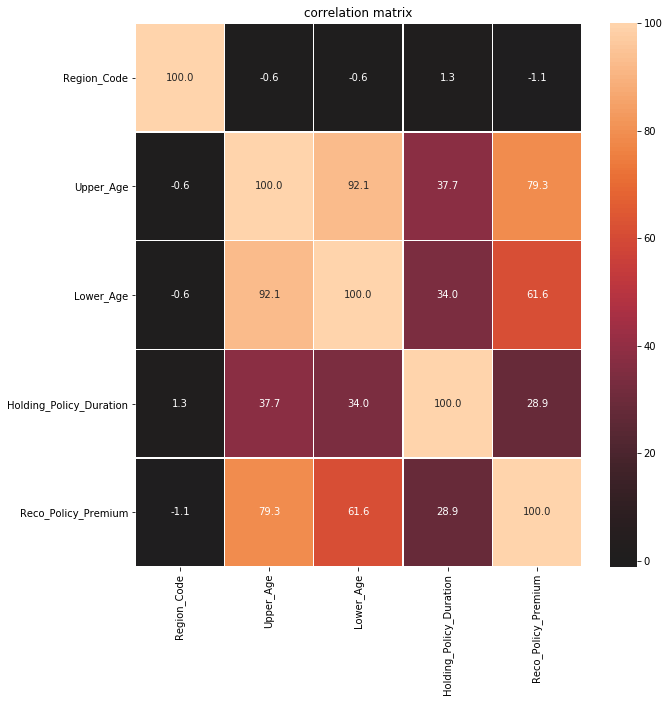

In [326]:
#CORELATION MATRIX
cor_mat = train_data[num_cols].corr()
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
fig, ax = plt.subplots(figsize=(10,10)) ;
x = sns.heatmap(100*cor_mat, annot=True,fmt='.1f',center=0,linewidths = 0.25).set_title('correlation matrix')
plt.show()


<center><b>Checking vars with high(0.65) correlation coeff</b></center>

In [327]:
var1 = []; var2 = []
for i in range(len(cor_mat.columns)):
    for j in range(len(cor_mat.index)):
        if (cor_mat.iloc[i,j] > 0.65) & (i>j):
            var1.append(cor_mat.columns[i]); var2.append(cor_mat.index[j])
high_cor_var = list(zip(var1,var2))
high_cor_var

[('Lower_Age', 'Upper_Age'), ('Reco_Policy_Premium', 'Upper_Age')]

<center><b> Removing features with high correlation</center></b>

In [328]:
features_cor=list(num_cols) + list(obj_cols)
features1 = [a for a in features_cor if a not in [b for a,b in high_cor_var]] # removing var1
features1

['Region_Code',
 'Lower_Age',
 'Holding_Policy_Duration',
 'Reco_Policy_Premium',
 'City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Type',
 'Reco_Policy_Cat']

<b>SUMMARY OF ABOVE ANALYSIS</B>
<BR>We removed upper age as it was highly corelated with lower age and Reco_Policy_Premium</br>

<center><b> BOX PLOTS FOR NUMERICAL VARIABLE </center></b>

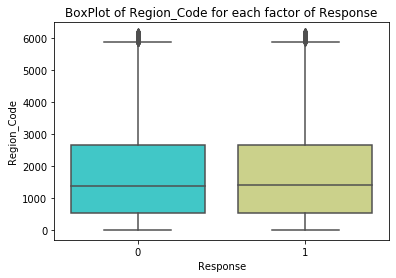

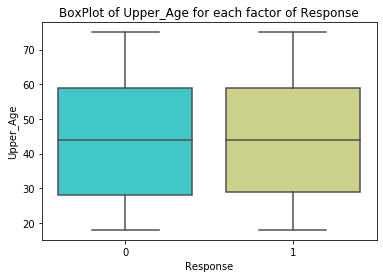

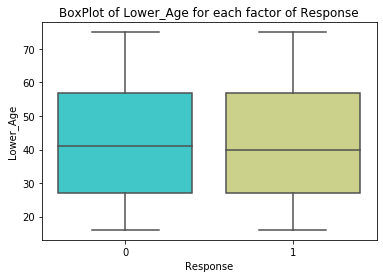

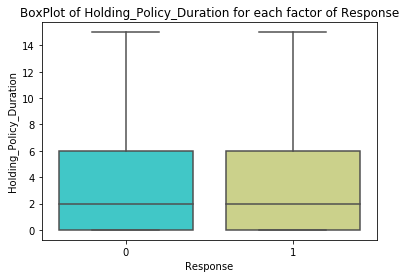

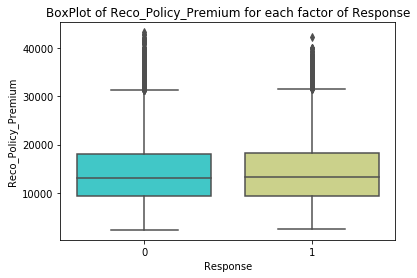

In [329]:
#BOX PLOTS FOR EACH VARIABLE
for i in num_cols:
    pfig = plt.figure();
    img = sns.boxplot(x=target,y=i,data=train_data,palette='rainbow').set_title(f'BoxPlot of {i} for each factor of {target}');
    fig = img.get_figure();

<center><b>ONE HOT ENCODING </CENTER></BA>

In [424]:
cont_df = train_data[num_cols]
cont_df= cont_df.drop(['Upper_Age'], axis = 1)

In [428]:
cat_df = train_data[obj_cols]
train = cont_df.join(pd.get_dummies(cat_df))
train

,Region_Code,Lower_Age,Holding_Policy_Duration,Reco_Policy_Premium,City_Code_C1,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,...,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21,Reco_Policy_Cat_22
ID,,,,,,,,,,,,,,,,,,,,,
1,3213,36,15.0,11628.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1117,22,0.0,30510.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3732,32,1.0,7450.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4378,48,15.0,17780.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,2190,44,3.0,10404.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50878,845,22,0.0,7704.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
50879,4188,27,7.0,5408.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50880,442,63,15.0,11374.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [429]:
features=train.columns
features

Index(['Region_Code', 'Lower_Age', 'Holding_Policy_Duration',
       'Reco_Policy_Premium', 'City_Code_C1', 'City_Code_C10', 'City_Code_C11',
       'City_Code_C12', 'City_Code_C13', 'City_Code_C14', 'City_Code_C15',
       'City_Code_C16', 'City_Code_C17', 'City_Code_C18', 'City_Code_C19',
       'City_Code_C2', 'City_Code_C20', 'City_Code_C21', 'City_Code_C22',
       'City_Code_C23', 'City_Code_C24', 'City_Code_C25', 'City_Code_C26',
       'City_Code_C27', 'City_Code_C28', 'City_Code_C29', 'City_Code_C3',
       'City_Code_C30', 'City_Code_C31', 'City_Code_C32', 'City_Code_C33',
       'City_Code_C34', 'City_Code_C35', 'City_Code_C36', 'City_Code_C4',
       'City_Code_C5', 'City_Code_C6', 'City_Code_C7', 'City_Code_C8',
       'City_Code_C9', 'Accomodation_Type_Owned', 'Accomodation_Type_Rented',
       'Reco_Insurance_Type_Individual', 'Reco_Insurance_Type_Joint',
       'Is_Spouse_No', 'Is_Spouse_Yes', 'Health Indicator_GH',
       'Health Indicator_X1', 'Health Indicator_X2', '

In [618]:
tcont_df = test_data[num_cols]
tcont_df= tcont_df.drop(['Upper_Age'], axis = 1)
tcont_df

,Region_Code,Lower_Age,Holding_Policy_Duration,Reco_Policy_Premium
ID,,,,
50883,156,30,6.0,11934.0
50884,7,68,3.0,32204.8
50885,564,28,2.0,9240.0
50886,1177,23,3.0,9086.0
50887,951,75,0.0,22534.0
...,...,...,...,...
72683,1044,45,4.0,15884.0
72684,266,59,6.0,21390.0
72685,2470,74,0.0,17836.0


In [619]:
tobj_cols = test_data.head().select_dtypes('O').columns # O means object
tobj_cols = [i for  i in obj_cols if i not in [target,'ID']] # removing target and id from obj columns as they are not vars
tobj_cols
tnum_cols = test_data.head().select_dtypes('number').columns # number will contain float and int
tnum_cols= [i for  i in num_cols if i not in [target,'ID']] # removing target and  id from num columns as they are not vars
tnum_cols

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Type',
 'Reco_Policy_Cat']

['Region_Code',
 'Upper_Age',
 'Lower_Age',
 'Holding_Policy_Duration',
 'Reco_Policy_Premium']

In [620]:
tcat_df = test_data[obj_cols]
test = tcont_df.join(pd.get_dummies(tcat_df))
test

,Region_Code,Lower_Age,Holding_Policy_Duration,Reco_Policy_Premium,City_Code_C1,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,...,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21,Reco_Policy_Cat_22
ID,,,,,,,,,,,,,,,,,,,,,
50883,156,30,6.0,11934.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50884,7,68,3.0,32204.8,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
50885,564,28,2.0,9240.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
50886,1177,23,3.0,9086.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
50887,951,75,0.0,22534.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72683,1044,45,4.0,15884.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
72684,266,59,6.0,21390.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
72685,2470,74,0.0,17836.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# <center><b> MODELLING </center></b>

<center><b> EVALUATION METRIC IS ROC_AUC SCORE </center></b>

In [435]:
X_train, X_test, y_train, y_test = train_test_split(train[features],train_data.Response,test_size = 0.25,\
                                                    random_state =61, stratify = train_data.Response)

In [436]:
X_train.shape, X_test.shape

((38161, 83), (12721, 83))

In [437]:
y_train.value_counts(normalize = True)

0    0.760043
1    0.239957
Name: Response, dtype: float64

In [438]:
y_train=y_train.astype('int')
y_train.value_counts()

0    29004
1     9157
Name: Response, dtype: int64

In [439]:
y_test=y_test.astype('int')
y_test.value_counts(dropna=False)

0    9669
1    3052
Name: Response, dtype: int64

In [440]:
train_data.shape

(50882, 13)

In [609]:
test_data.shape

(21805, 12)

In [610]:
test.shape

(21805, 83)

In [611]:
train.shape

(50882, 83)

In [441]:
train.columns

Index(['Region_Code', 'Lower_Age', 'Holding_Policy_Duration',
       'Reco_Policy_Premium', 'City_Code_C1', 'City_Code_C10', 'City_Code_C11',
       'City_Code_C12', 'City_Code_C13', 'City_Code_C14', 'City_Code_C15',
       'City_Code_C16', 'City_Code_C17', 'City_Code_C18', 'City_Code_C19',
       'City_Code_C2', 'City_Code_C20', 'City_Code_C21', 'City_Code_C22',
       'City_Code_C23', 'City_Code_C24', 'City_Code_C25', 'City_Code_C26',
       'City_Code_C27', 'City_Code_C28', 'City_Code_C29', 'City_Code_C3',
       'City_Code_C30', 'City_Code_C31', 'City_Code_C32', 'City_Code_C33',
       'City_Code_C34', 'City_Code_C35', 'City_Code_C36', 'City_Code_C4',
       'City_Code_C5', 'City_Code_C6', 'City_Code_C7', 'City_Code_C8',
       'City_Code_C9', 'Accomodation_Type_Owned', 'Accomodation_Type_Rented',
       'Reco_Insurance_Type_Individual', 'Reco_Insurance_Type_Joint',
       'Is_Spouse_No', 'Is_Spouse_Yes', 'Health Indicator_GH',
       'Health Indicator_X1', 'Health Indicator_X2', '

# <center><b> LOGISTIC REGRESSION </center></b>

In [442]:
scl = StandardScaler()
logreg = LogisticRegression()

In [443]:
features_lr = features

In [444]:
from sklearn.pipeline import make_pipeline,Pipeline
pipe = Pipeline([('sc', scl), ('lr', logreg)])
#pipe[0]
#pipe[1]

In [445]:
pipe.fit(X_train[features_lr], y_train)

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [446]:
estimator= pipe
pred_bin_tr = estimator.predict(X_train[features_lr])
pred_bin_te = estimator.predict(X_test[features_lr])
#confusion_matrix(y_train,pred_bin_tr)
f'train_roca : {roc_auc_score(y_train,estimator.predict_proba(X_train[features_lr])[:,1])} ; \
test_roca : {roc_auc_score(y_test,estimator.predict_proba(X_test[features_lr])[:,1])}'
f'train_f1_s : {f1_score(y_train,pred_bin_tr)} ; test_f1_s : {f1_score(y_test,pred_bin_te)}'
f'train_prec : {precision_score(y_train,pred_bin_tr)} ; test_prec : {precision_score(y_test,pred_bin_te)}'
f'train_reca : {recall_score(y_train,pred_bin_tr)} ; test_reca : {recall_score(y_test,pred_bin_te)}'
f'train_accu : {accuracy_score(y_train,pred_bin_tr)} ; test_accu : {accuracy_score(y_test,pred_bin_te)}'
f'train_conf : {confusion_matrix(y_train,pred_bin_tr)} ; test_conf : {confusion_matrix(y_test,pred_bin_te)}'

'train_roca : 0.6324404392779976 ; test_roca : 0.6245444731761542'

'train_f1_s : 0.016785022595222725 ; test_f1_s : 0.017357762777242047'

'train_prec : 0.5693430656934306 ; test_prec : 0.4576271186440678'

'train_reca : 0.008518073604892432 ; test_reca : 0.008846657929226736'

'train_accu : 0.7605408663294987 ; test_accu : 0.7596887037182611'

'train_conf : [[28945    59]\n [ 9079    78]] ; test_conf : [[9637   32]\n [3025   27]]'

<center><b> ROC SCORE :TRAIN 63.24%, TEST 62.45% </CENTER></B>

In [447]:
def logreg_coef(model,data):    
    """
    Gives the intercepts and coefficients along with variable names for logistic regression.
    model : name of the logistic model
    data :  data on which logistic model was fit, column order must be same as that of the
            data on which model was fit
    """
    intercept = pd.DataFrame({'variable' : 'intercept', 'coefficient' : model.intercept_})
    coefficient = pd.DataFrame({'variable' : data.columns, 'coefficient' : model.coef_.transpose().flatten()})
    coefficient = coefficient.reindex(coefficient.coefficient.abs().sort_values(ascending = False).index)
    return(pd.concat([intercept,coefficient], axis = 0).reset_index(drop = True))

In [448]:
#to check the important features
df=(logreg_coef(pipe[1],X_train))
df=df.sort_values(by=['coefficient'],ascending=False)
df

,variable,coefficient
2,Reco_Policy_Cat_22,0.214804
4,Reco_Policy_Cat_15,0.199072
5,Reco_Policy_Cat_17,0.134653
6,Reco_Policy_Cat_12,0.116373
8,Reco_Policy_Cat_19,0.095969
...,...,...
10,Reco_Policy_Cat_6,-0.060684
7,Reco_Policy_Cat_2,-0.104793
3,Reco_Policy_Cat_4,-0.204168
1,Reco_Policy_Cat_1,-0.765553


In [453]:
df.to_csv("score.csv")

In [458]:
list=tuple(df['variable'])
list

('Reco_Policy_Cat_22',
 'Reco_Policy_Cat_15',
 'Reco_Policy_Cat_17',
 'Reco_Policy_Cat_12',
 'Reco_Policy_Cat_19',
 'Reco_Policy_Cat_20',
 'Reco_Policy_Cat_5',
 'City_Code_C13',
 'Holding_Policy_Duration',
 'City_Code_C19',
 'City_Code_C9',
 'Region_Code',
 'City_Code_C32',
 'Reco_Insurance_Type_Joint',
 'Reco_Policy_Cat_8',
 'Is_Spouse_No',
 'Reco_Policy_Cat_13',
 'Reco_Policy_Cat_14',
 'Health Indicator_X7',
 'City_Code_C24',
 'City_Code_C28',
 'Holding_Policy_Type_NP',
 'City_Code_C34',
 'Reco_Policy_Cat_16',
 'City_Code_C27',
 'City_Code_C5',
 'Holding_Policy_Type_3.0',
 'City_Code_C30',
 'City_Code_C4',
 'City_Code_C35',
 'City_Code_C17',
 'Health Indicator_X1',
 'City_Code_C23',
 'Reco_Policy_Cat_18',
 'Lower_Age',
 'City_Code_C22',
 'Health Indicator_X4',
 'City_Code_C29',
 'Health Indicator_X9',
 'Health Indicator_X2',
 'City_Code_C33',
 'City_Code_C8',
 'Accomodation_Type_Owned',
 'City_Code_C18',
 'Health Indicator_X8',
 'City_Code_C25',
 'Accomodation_Type_Rented',
 'Health 

<center><b> SELECTIVE LOGREG </CENTER></B>

In [462]:
scl_s = StandardScaler()
logreg_s = LogisticRegression()

In [463]:
#taking top 20 features 
features_lr1=[]
for i in range(20):
    features_lr1.append(list[i])


In [464]:
features_lr1

['Reco_Policy_Cat_22',
 'Reco_Policy_Cat_15',
 'Reco_Policy_Cat_17',
 'Reco_Policy_Cat_12',
 'Reco_Policy_Cat_19',
 'Reco_Policy_Cat_20',
 'Reco_Policy_Cat_5',
 'City_Code_C13',
 'Holding_Policy_Duration',
 'City_Code_C19',
 'City_Code_C9',
 'Region_Code',
 'City_Code_C32',
 'Reco_Insurance_Type_Joint',
 'Reco_Policy_Cat_8',
 'Is_Spouse_No',
 'Reco_Policy_Cat_13',
 'Reco_Policy_Cat_14',
 'Health Indicator_X7',
 'City_Code_C24']

In [630]:
test_lr= test[['Reco_Policy_Cat_22',
 'Reco_Policy_Cat_15',
 'Reco_Policy_Cat_17',
 'Reco_Policy_Cat_12',
 'Reco_Policy_Cat_19',
 'Reco_Policy_Cat_20',
 'Reco_Policy_Cat_5',
 'City_Code_C13',
 'Holding_Policy_Duration',
 'City_Code_C19',
 'City_Code_C9',
 'Region_Code',
 'City_Code_C32',
 'Reco_Insurance_Type_Joint',
 'Reco_Policy_Cat_8',
 'Is_Spouse_No',
 'Reco_Policy_Cat_13',
 'Reco_Policy_Cat_14',
 'Health Indicator_X7',
 'City_Code_C24']]

In [465]:
pipe = Pipeline([('sc', scl_s), ('lr', logreg_s)])
#pipe[0]
#pipe[1]

In [466]:
pipe.fit(X_train[features_lr1], y_train)

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [467]:
estimator= pipe
pred_bin_tr = estimator.predict(X_train[features_lr1])
pred_bin_te = estimator.predict(X_test[features_lr1])
#confusion_matrix(y_train,pred_bin_tr)
f'train_roca : {roc_auc_score(y_train,estimator.predict_proba(X_train[features_lr1])[:,1])} ; \
test_roca : {roc_auc_score(y_test,estimator.predict_proba(X_test[features_lr1])[:,1])}'
f'train_f1_s : {f1_score(y_train,pred_bin_tr)} ; test_f1_s : {f1_score(y_test,pred_bin_te)}'
f'train_prec : {precision_score(y_train,pred_bin_tr)} ; test_prec : {precision_score(y_test,pred_bin_te)}'
f'train_reca : {recall_score(y_train,pred_bin_tr)} ; test_reca : {recall_score(y_test,pred_bin_te)}'
f'train_accu : {accuracy_score(y_train,pred_bin_tr)} ; test_accu : {accuracy_score(y_test,pred_bin_te)}'
f'train_conf : {confusion_matrix(y_train,pred_bin_tr)} ; test_conf : {confusion_matrix(y_test,pred_bin_te)}'

'train_roca : 0.6102007078378829 ; test_roca : 0.6020543082180055'

'train_f1_s : 0.0037028969723371815 ; test_f1_s : 0.005870841487279842'

'train_prec : 0.68 ; test_prec : 0.6428571428571429'

'train_reca : 0.0018565032215791199 ; test_reca : 0.002948885976408912'

'train_accu : 0.7602788186892377 ; test_accu : 0.7603961952676677'

'train_conf : [[28996     8]\n [ 9140    17]] ; test_conf : [[9664    5]\n [3043    9]]'

In [633]:
#FINAL PREDICTION ON TEST SET
y_pred_LR = pipe.predict(test_lr)
y_pred_LR.shape

(21805,)

# <center><b> GRID SEARCH FOR LOGISTIC REGRESSION </center></b>

In [634]:
# Create logistic regression
logistic = linear_model.LogisticRegression()

In [635]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [636]:
# Create grid search using 5-fold cross validation
clf1 = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
clf1

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
            

In [637]:
# Fit grid search
best_model = clf1.fit(X_train, y_train)

In [638]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [802]:

logistic1 = linear_model.LogisticRegression(C=1.0,penalty='l2')
clf2 = GridSearchCV(logistic1, hyperparameters, cv=5, verbose=0)
best_model1 = clf2.fit(X_train, y_train)

In [804]:
scl_s1 = StandardScaler()

In [805]:
pipe1 = Pipeline([('sc', scl_s), ('blr', best_model1)])

In [806]:
pipe1.fit(X_train[features_lr1], y_train)

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('blr',
                 GridSearchCV(cv=5, error_score=nan,
                              estimator=LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                         

In [807]:
estimator= pipe1
pred_bin_tr = estimator.predict(X_train[features_lr1])
pred_bin_te = estimator.predict(X_test[features_lr1])
#confusion_matrix(y_train,pred_bin_tr)
f'train_roca : {roc_auc_score(y_train,estimator.predict_proba(X_train[features_lr1])[:,1])} ; \
test_roca : {roc_auc_score(y_test,estimator.predict_proba(X_test[features_lr1])[:,1])}'
f'train_f1_s : {f1_score(y_train,pred_bin_tr)} ; test_f1_s : {f1_score(y_test,pred_bin_te)}'
f'train_prec : {precision_score(y_train,pred_bin_tr)} ; test_prec : {precision_score(y_test,pred_bin_te)}'
f'train_reca : {recall_score(y_train,pred_bin_tr)} ; test_reca : {recall_score(y_test,pred_bin_te)}'
f'train_accu : {accuracy_score(y_train,pred_bin_tr)} ; test_accu : {accuracy_score(y_test,pred_bin_te)}'
f'train_conf : {confusion_matrix(y_train,pred_bin_tr)} ; test_conf : {confusion_matrix(y_test,pred_bin_te)}'

'train_roca : 0.6102007078378829 ; test_roca : 0.6020543082180055'

'train_f1_s : 0.0037028969723371815 ; test_f1_s : 0.005870841487279842'

'train_prec : 0.68 ; test_prec : 0.6428571428571429'

'train_reca : 0.0018565032215791199 ; test_reca : 0.002948885976408912'

'train_accu : 0.7602788186892377 ; test_accu : 0.7603961952676677'

'train_conf : [[28996     8]\n [ 9140    17]] ; test_conf : [[9664    5]\n [3043    9]]'

In [808]:
#FINAL PREDICTION ON TEST SET
y_pred_GRIDLR = pipe.predict(test_lr)
y_pred_GRIDLR.shape

(21805,)

# <b><center>DECISION TREE </b></center>

In [600]:
dt = DecisionTreeClassifier(splitter='random',min_samples_split=100,min_samples_leaf=3,max_features='auto',presort=True)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=None, splitter='random')

In [601]:
estimator=dt
pred_bin_tr = estimator.predict(X_train)
pred_bin_te = estimator.predict(X_test)
f'train_roca : {roc_auc_score(y_train,estimator.predict_proba(X_train)[:,1])} ; \
test_roca : {roc_auc_score(y_test,estimator.predict_proba(X_test)[:,1])}'
f'train_f1_s : {f1_score(y_train,pred_bin_tr)} ; test_f1_s : {f1_score(y_test,pred_bin_te)}'
f'train_prec : {precision_score(y_train,pred_bin_tr)} ; test_prec : {precision_score(y_test,pred_bin_te)}'
f'train_reca : {recall_score(y_train,pred_bin_tr)} ; test_reca : {recall_score(y_test,pred_bin_te)}'
f'train_accu : {accuracy_score(y_train,pred_bin_tr)} ; test_accu : {accuracy_score(y_test,pred_bin_te)}'
f'train_conf : {confusion_matrix(y_train,pred_bin_tr)} ; test_conf : {confusion_matrix(y_test,pred_bin_te)}'

'train_roca : 0.716478886743273 ; test_roca : 0.641913472912784'

'train_f1_s : 0.197062311832862 ; test_f1_s : 0.15024766097963677'

'train_prec : 0.5986696230598669 ; test_prec : 0.4690721649484536'

'train_reca : 0.11794255760620291 ; test_reca : 0.08944954128440367'

'train_accu : 0.7693718718062944 ; test_accu : 0.7572517883814166'

'train_conf : [[28280   724]\n [ 8077  1080]] ; test_conf : [[9360  309]\n [2779  273]]'

In [602]:
list=[]
for feature in zip(features_lr,dt.feature_importances_):
    list.append(feature)
    
list.sort(key=lambda x:x[1],reverse=True)
list

[('Reco_Policy_Cat_15', 0.08691274680090035),
 ('Reco_Policy_Cat_22', 0.06082323082798018),
 ('Reco_Policy_Cat_1', 0.034918117424660215),
 ('Reco_Policy_Cat_17', 0.03432863996144966),
 ('City_Code_C21', 0.029729301538386804),
 ('City_Code_C4', 0.02847089214487638),
 ('Reco_Policy_Cat_16', 0.02708792940098794),
 ('Lower_Age', 0.023877691031737005),
 ('City_Code_C1', 0.023813496612730294),
 ('Reco_Policy_Cat_20', 0.02330742030036244),
 ('Reco_Policy_Cat_19', 0.022997079572478353),
 ('City_Code_C6', 0.021385914339998882),
 ('Holding_Policy_Type_3.0', 0.020140230377727254),
 ('Reco_Policy_Cat_12', 0.01925969970473169),
 ('Holding_Policy_Type_NP', 0.019184560054485666),
 ('City_Code_C10', 0.018892688871262314),
 ('City_Code_C12', 0.016769213507748328),
 ('City_Code_C15', 0.01669219888239774),
 ('Holding_Policy_Type_1.0', 0.016174836029129728),
 ('City_Code_C22', 0.01598275071067091),
 ('Region_Code', 0.015719507427788406),
 ('City_Code_C2', 0.014561859557576903),
 ('Holding_Policy_Duration'

In [603]:
slist=tuple(list)
slist


(('Reco_Policy_Cat_15', 0.08691274680090035),
 ('Reco_Policy_Cat_22', 0.06082323082798018),
 ('Reco_Policy_Cat_1', 0.034918117424660215),
 ('Reco_Policy_Cat_17', 0.03432863996144966),
 ('City_Code_C21', 0.029729301538386804),
 ('City_Code_C4', 0.02847089214487638),
 ('Reco_Policy_Cat_16', 0.02708792940098794),
 ('Lower_Age', 0.023877691031737005),
 ('City_Code_C1', 0.023813496612730294),
 ('Reco_Policy_Cat_20', 0.02330742030036244),
 ('Reco_Policy_Cat_19', 0.022997079572478353),
 ('City_Code_C6', 0.021385914339998882),
 ('Holding_Policy_Type_3.0', 0.020140230377727254),
 ('Reco_Policy_Cat_12', 0.01925969970473169),
 ('Holding_Policy_Type_NP', 0.019184560054485666),
 ('City_Code_C10', 0.018892688871262314),
 ('City_Code_C12', 0.016769213507748328),
 ('City_Code_C15', 0.01669219888239774),
 ('Holding_Policy_Type_1.0', 0.016174836029129728),
 ('City_Code_C22', 0.01598275071067091),
 ('Region_Code', 0.015719507427788406),
 ('City_Code_C2', 0.014561859557576903),
 ('Holding_Policy_Duration'

<b>IMPORTANT FEATURES OF DECISION TREE</B>

In [604]:
#taking top 25 features 
features_dtt=[]
for i in range(25):
    features_dtt.append(slist[i])
    
features_dtt

[('Reco_Policy_Cat_15', 0.08691274680090035),
 ('Reco_Policy_Cat_22', 0.06082323082798018),
 ('Reco_Policy_Cat_1', 0.034918117424660215),
 ('Reco_Policy_Cat_17', 0.03432863996144966),
 ('City_Code_C21', 0.029729301538386804),
 ('City_Code_C4', 0.02847089214487638),
 ('Reco_Policy_Cat_16', 0.02708792940098794),
 ('Lower_Age', 0.023877691031737005),
 ('City_Code_C1', 0.023813496612730294),
 ('Reco_Policy_Cat_20', 0.02330742030036244),
 ('Reco_Policy_Cat_19', 0.022997079572478353),
 ('City_Code_C6', 0.021385914339998882),
 ('Holding_Policy_Type_3.0', 0.020140230377727254),
 ('Reco_Policy_Cat_12', 0.01925969970473169),
 ('Holding_Policy_Type_NP', 0.019184560054485666),
 ('City_Code_C10', 0.018892688871262314),
 ('City_Code_C12', 0.016769213507748328),
 ('City_Code_C15', 0.01669219888239774),
 ('Holding_Policy_Type_1.0', 0.016174836029129728),
 ('City_Code_C22', 0.01598275071067091),
 ('Region_Code', 0.015719507427788406),
 ('City_Code_C2', 0.014561859557576903),
 ('Holding_Policy_Duration'

In [605]:
features_dt1=['Reco_Policy_Cat_15','Reco_Policy_Cat_22','Reco_Policy_Cat_1','Reco_Policy_Cat_17','City_Code_C21','City_Code_C4'
              ,'Reco_Policy_Cat_16','Lower_Age','City_Code_C1','Reco_Policy_Cat_20','Reco_Policy_Cat_19','City_Code_C6',
              'Holding_Policy_Type_3.0','Reco_Policy_Cat_12','Holding_Policy_Type_NP','City_Code_C10','City_Code_C12','City_Code_C15',
              'Holding_Policy_Type_1.0','City_Code_C22','Region_Code','City_Code_C2','Holding_Policy_Duration','City_Code_C16','City_Code_C17']

In [625]:
test_tt= test[['Reco_Policy_Cat_15','Reco_Policy_Cat_22','Reco_Policy_Cat_1','Reco_Policy_Cat_17','City_Code_C21','City_Code_C4'
              ,'Reco_Policy_Cat_16','Lower_Age','City_Code_C1','Reco_Policy_Cat_20','Reco_Policy_Cat_19','City_Code_C6',
              'Holding_Policy_Type_3.0','Reco_Policy_Cat_12','Holding_Policy_Type_NP','City_Code_C10','City_Code_C12','City_Code_C15',
              'Holding_Policy_Type_1.0','City_Code_C22','Region_Code','City_Code_C2','Holding_Policy_Duration','City_Code_C16','City_Code_C17']]

In [606]:
dt1 = DecisionTreeClassifier(splitter='random',min_samples_split=100,min_samples_leaf=3,max_features='auto',presort=True)
dt1.fit(X_train[features_dt1],y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=None, splitter='random')

In [607]:
estimator= dt1
pred_bin_tr = estimator.predict(X_train[features_dt1])
pred_bin_te = estimator.predict(X_test[features_dt1])
f'train_roca : {roc_auc_score(y_train,estimator.predict_proba(X_train[features_dt1])[:,1])} ; \
test_roca : {roc_auc_score(y_test,estimator.predict_proba(X_test[features_dt1])[:,1])}'
f'train_f1_s : {f1_score(y_train,pred_bin_tr)} ; test_f1_s : {f1_score(y_test,pred_bin_te)}'
f'train_prec : {precision_score(y_train,pred_bin_tr)} ; test_prec : {precision_score(y_test,pred_bin_te)}'
f'train_reca : {recall_score(y_train,pred_bin_tr)} ; test_reca : {recall_score(y_test,pred_bin_te)}'
f'train_accu : {accuracy_score(y_train,pred_bin_tr)} ; test_accu : {accuracy_score(y_test,pred_bin_te)}'
f'train_conf : {confusion_matrix(y_train,pred_bin_tr)} ; test_conf : {confusion_matrix(y_test,pred_bin_te)}'

'train_roca : 0.685463513281475 ; test_roca : 0.6276677250273706'

'train_f1_s : 0.11369917094354519 ; test_f1_s : 0.09249925882004151'

'train_prec : 0.5907692307692308 ; test_prec : 0.48598130841121495'

'train_reca : 0.06290269738997488 ; test_reca : 0.05111402359108781'

'train_accu : 0.7646812190456225 ; test_accu : 0.7593742630296361'

'train_conf : [[28605   399]\n [ 8581   576]] ; test_conf : [[9504  165]\n [2896  156]]'

In [631]:
y_pred_DT = dt1.predict(test_tt)
y_pred_DT.shape

(21805,)

# <CENTER><B>RANDOM FOREST</B></CENTER>

In [677]:
%%time
rf = RandomForestClassifier(n_estimators=1000,min_samples_split=900,min_samples_leaf=3,max_features='auto',oob_score=True)
rf.fit(X_train, y_train)

Wall time: 50.1 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=900,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [678]:
estimator= rf
pred_bin_tr = estimator.predict(X_train)
pred_bin_te = estimator.predict(X_test)
f'train_roca : {roc_auc_score(y_train,estimator.predict_proba(X_train)[:,1])} ; \
test_roca : {roc_auc_score(y_test,estimator.predict_proba(X_test)[:,1])}'
f'train_f1_s : {f1_score(y_train,pred_bin_tr)} ; test_f1_s : {f1_score(y_test,pred_bin_te)}'
f'train_prec : {precision_score(y_train,pred_bin_tr)} ; test_prec : {precision_score(y_test,pred_bin_te)}'
f'train_reca : {recall_score(y_train,pred_bin_tr)} ; test_reca : {recall_score(y_test,pred_bin_te)}'
f'train_accu : {accuracy_score(y_train,pred_bin_tr)} ; test_accu : {accuracy_score(y_test,pred_bin_te)}'
f'train_conf : {confusion_matrix(y_train,pred_bin_tr)} ; test_conf : {confusion_matrix(y_test,pred_bin_te)}'

'train_roca : 0.687162297618038 ; test_roca : 0.6572410144051187'

'train_f1_s : 0.0008731717965509714 ; test_f1_s : 0.0006548788474132286'

'train_prec : 0.8 ; test_prec : 0.5'

'train_reca : 0.00043682428743038114 ; test_reca : 0.000327653997378768'

'train_accu : 0.7601215901050811 ; test_accu : 0.7600817545790425'

'train_conf : [[29003     1]\n [ 9153     4]] ; test_conf : [[9668    1]\n [3051    1]]'

<b>IMPORTANT FEATURES OF RANDOM FOREST</B>

In [682]:
list_rf=[]
for feature in zip(features_lr,rf.feature_importances_):
    list_rf.append(feature)
    
list_rf.sort(key=lambda x:x[1],reverse=True)
srflist=tuple(list_rf)
#taking top 25 features 
features_rf=[]
for i in range(25):
    features_rf.append(srflist[i])
    
features_rf


[('Reco_Policy_Cat_1', 0.1732520605642248),
 ('Reco_Policy_Cat_15', 0.1281939380830153),
 ('Reco_Policy_Cat_22', 0.09818595562813175),
 ('Region_Code', 0.04528997142599974),
 ('Reco_Policy_Cat_4', 0.04492835759288478),
 ('Reco_Policy_Premium', 0.03137834056417852),
 ('Reco_Policy_Cat_2', 0.029258492072303504),
 ('Reco_Policy_Cat_17', 0.02911282161163791),
 ('Reco_Policy_Cat_12', 0.029018339234886836),
 ('Lower_Age', 0.023930352726373356),
 ('Reco_Policy_Cat_21', 0.021900391747314427),
 ('Holding_Policy_Type_3.0', 0.01835246755620282),
 ('Reco_Policy_Cat_19', 0.015807232877861153),
 ('Holding_Policy_Type_1.0', 0.014585440716814422),
 ('Holding_Policy_Type_4.0', 0.013041921195405858),
 ('Holding_Policy_Duration', 0.01247211131946919),
 ('Reco_Policy_Cat_18', 0.012087705714160924),
 ('City_Code_C6', 0.011889399321179947),
 ('Reco_Policy_Cat_16', 0.010823590625067967),
 ('City_Code_C19', 0.009379708990823864),
 ('City_Code_C4', 0.009374645103739903),
 ('City_Code_C10', 0.009369461626888578

In [683]:
features_rf1=['Reco_Policy_Cat_1','Reco_Policy_Cat_15','Reco_Policy_Cat_22','Region_Code','Reco_Policy_Cat_4','Reco_Policy_Premium',
            'Reco_Policy_Cat_2','Reco_Policy_Cat_17','Reco_Policy_Cat_12','Lower_Age','Reco_Policy_Cat_21','Holding_Policy_Type_3.0',
            'Reco_Policy_Cat_19','Holding_Policy_Type_1.0','Holding_Policy_Type_4.0','Holding_Policy_Duration','Reco_Policy_Cat_18',
            'City_Code_C6','Reco_Policy_Cat_16','Reco_Policy_Cat_16', 'City_Code_C19','City_Code_C4','City_Code_C10','City_Code_C2',
            'Reco_Policy_Cat_5', 'Reco_Policy_Cat_6']

In [684]:
test_rf= test[['Reco_Policy_Cat_1','Reco_Policy_Cat_15','Reco_Policy_Cat_22','Region_Code','Reco_Policy_Cat_4','Reco_Policy_Premium',
            'Reco_Policy_Cat_2','Reco_Policy_Cat_17','Reco_Policy_Cat_12','Lower_Age','Reco_Policy_Cat_21','Holding_Policy_Type_3.0',
            'Reco_Policy_Cat_19','Holding_Policy_Type_1.0','Holding_Policy_Type_4.0','Holding_Policy_Duration','Reco_Policy_Cat_18',
            'City_Code_C6','Reco_Policy_Cat_16','Reco_Policy_Cat_16', 'City_Code_C19','City_Code_C4','City_Code_C10','City_Code_C2',
            'Reco_Policy_Cat_5', 'Reco_Policy_Cat_6']]

In [763]:
%%time
rf2 = RandomForestClassifier(n_estimators=100,min_samples_split=20,min_samples_leaf=20,max_features='log2',n_jobs=-1,oob_score=True,verbose=5)
rf2.fit(X_train[features_rf1], y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100building tree 7 of 100

building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100

[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s



building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 6

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.0s



building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished


Wall time: 2.3 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=5,
                       warm_start=False)

In [764]:
estimator= rf2
pred_bin_tr = estimator.predict(X_train[features_rf1])
pred_bin_te = estimator.predict(X_test[features_rf1])
f'train_roca : {roc_auc_score(y_train,estimator.predict_proba(X_train[features_rf1])[:,1])} ; \
test_roca : {roc_auc_score(y_test,estimator.predict_proba(X_test[features_rf1])[:,1])}'
f'train_f1_s : {f1_score(y_train,pred_bin_tr)} ; test_f1_s : {f1_score(y_test,pred_bin_te)}'
f'train_prec : {precision_score(y_train,pred_bin_tr)} ; test_prec : {precision_score(y_test,pred_bin_te)}'
f'train_reca : {recall_score(y_train,pred_bin_tr)} ; test_reca : {recall_score(y_test,pred_bin_te)}'
f'train_accu : {accuracy_score(y_train,pred_bin_tr)} ; test_accu : {accuracy_score(y_test,pred_bin_te)}'
f'train_conf : {confusion_matrix(y_train,pred_bin_tr)} ; test_conf : {confusion_matrix(y_test,pred_bin_te)}'

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  64 tasks      |

'train_roca : 0.7461138505002161 ; test_roca : 0.6572607027878343'

'train_f1_s : 0.0089062669707831 ; test_f1_s : 0.00196078431372549'

'train_prec : 0.82 ; test_prec : 0.375'

'train_reca : 0.004477448946161406 ; test_reca : 0.000982961992136304'

'train_accu : 0.760881528261838 ; test_accu : 0.7599245342347299'

'train_conf : [[28995     9]\n [ 9116    41]] ; test_conf : [[9664    5]\n [3049    3]]'

In [723]:
y_pred_RF = rf2.predict(test_rf)
y_pred_RF.shape

(21805,)

# <center> <b> XGBOOST </center> </b>

In [486]:
np.arange(0.5,8,1)

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])

In [487]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': np.arange(0.5,1,0.1),
        'colsample_bytree': np.arange(0.5,1,0.1),
        'max_depth': np.arange(3,11,1),
        'n_estimators': np.arange(100,501,50),
        'max_delta_step' : np.arange(1,8,1),
        'bootstrap' : [True, False]
        }

In [488]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [491]:
xgb = XGBClassifier(learning_rate=0.001, objective='binary:logistic',
                    silent=True, n_jobs = -1,random_state = 53)

<b>STRATIFIED K FOLD </b>

In [492]:
skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 1001)

# <b><center>RANDOMISED SEARCH USING STRATIFIED K FOLD</B></center>

In [493]:
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=20, \
          scoring='f1_macro', n_jobs=-1, cv=skf, verbose=3, random_state=1001 )

In [494]:
%%time
random_search.fit(X_train, y_train);

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 20.2min finished


[16:14:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bootstrap, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Wall time: 21min 2s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=1001, shuffle=True),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.001,
                                           max_delta_step=None, max_depth=None,
                                           min...
                                        'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_delta_step': array([1, 2, 3, 4, 5, 6, 7

In [495]:
estimator= random_search
pred_bin_tr = estimator.predict(X_train)
pred_bin_te = estimator.predict(X_test)
f'train_roca : {roc_auc_score(y_train,estimator.predict_proba(X_train)[:,1])} ; test_roca : {roc_auc_score(y_test,estimator.predict_proba(X_test)[:,1])}'
f'train_f1_s : {f1_score(y_train,pred_bin_tr)} ; test_f1_s : {f1_score(y_test,pred_bin_te)}'
f'train_prec : {precision_score(y_train,pred_bin_tr)} ; test_prec : {precision_score(y_test,pred_bin_te)}'
f'train_reca : {recall_score(y_train,pred_bin_tr)} ; test_reca : {recall_score(y_test,pred_bin_te)}'
f'train_accu : {accuracy_score(y_train,pred_bin_tr)} ; test_accu : {accuracy_score(y_test,pred_bin_te)}'
f'train_conf : {confusion_matrix(y_train,pred_bin_tr)} ; test_conf : {confusion_matrix(y_test,pred_bin_te)}'

'train_roca : 0.641141729751585 ; test_roca : 0.6317843252550646'

'train_f1_s : 0.024678111587982835 ; test_f1_s : 0.01419812842852533'

'train_prec : 0.7055214723926381 ; test_prec : 0.46808510638297873'

'train_reca : 0.012558698263623458 ; test_reca : 0.007208387942332897'

'train_accu : 0.7617986950027515 ; test_accu : 0.7598459240625737'

'train_conf : [[28956    48]\n [ 9042   115]] ; test_conf : [[9644   25]\n [3030   22]]'

In [728]:
y_pred_XGB= random_search.predict(test)
y_pred_XGB.shape

(21805,)

# <b><center>FINAL PREDICTIONS ON TEST DATA USING XGBOOST MODEL</b></center>

In [785]:
test_data['Response']=y_pred_XGB

In [799]:
test_data['Response']=y_pred_LR

In [793]:
test_data['Response']=y_pred_RF

In [794]:
test_data

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Predictions,Response
ID,,,,,,,,,,,,,,
50883,C1,156,Owned,Individual,30,30,No,GH,6.0,3,5,11934.0,0,0
50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3,18,32204.8,0,0
50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4,17,9240.0,0,0
50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3,18,9086.0,0,0
50887,C1,951,Owned,Individual,75,75,No,X3,0.0,NP,5,22534.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1,18,15884.0,0,0
72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3,18,21390.0,0,0
72685,C12,2470,Owned,Individual,74,74,No,X3,0.0,NP,1,17836.0,0,0


In [795]:
#RANDOM FOREST
test_data['Response'].value_counts()

0    21234
1      571
Name: Response, dtype: int64

In [800]:
#LOGISTIC
test_data['Response'].value_counts()

0    21790
1       15
Name: Response, dtype: int64

In [787]:
#xgb
test_data['Response'].value_counts()

0    21722
1       83
Name: Response, dtype: int64

In [796]:
Predictionset=test_data.reset_index()
Predictionset

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Predictions,Response
0,50883,C1,156,Owned,Individual,30,30,No,GH,6.0,3,5,11934.0,0,0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3,18,32204.8,0,0
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4,17,9240.0,0,0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3,18,9086.0,0,0
4,50887,C1,951,Owned,Individual,75,75,No,X3,0.0,NP,5,22534.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1,18,15884.0,0,0
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3,18,21390.0,0,0
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,0.0,NP,1,17836.0,0,0
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1,19,11568.0,0,0


In [798]:
Predictionsetrf= Predictionset[['ID','Response']]
Predictionsetrf.to_csv("Predictionsrf.csv")

In [801]:
Predictionsetlr= Predictionset[['ID','Response']]
Predictionsetlr.to_csv("Predictionslr.csv")

In [789]:
Predictionset= Predictionset[['ID','Response']]
Predictionset

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0
...,...,...
21800,72683,0
21801,72684,0
21802,72685,0
21803,72686,0


In [790]:
Predictionset.to_csv("Predictions.csv")